In [113]:
cd("/Users/michael/work/GitHub/epinets")

In [114]:
include("EpiSim.jl")

Main.EpiSim

In [115]:
using CSV
using Plots
using LightGraphs
using JLD2, FileIO

In [129]:
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")

In [130]:
file="time_series_covid19_confirmed_global.csv"
allstates=["Australian Capital Territory" "New South Wales"  "Northern Territory" "Queensland" "South Australia" "Tasmania" "Victoria" "Western Australia"]

1×8 Array{String,2}:
 "Australian Capital Territory"  …  "Victoria"  "Western Australia"

In [131]:
z=[]
for state in allstates
    z=push!(z,EpiSim.getdata("Australia",state))
end

In [132]:
ddays=CSV.File(file)[1]
ddays=propertynames(ddays,4)[5:end]
ddays=String.(ddays)
ndays=length(ddays)

88

In [133]:
pops=[426709 8089526 245869 5095100 1751693 534281 6594804 2621680]

1×8 Array{Int64,2}:
 426709  8089526  245869  5095100  1751693  534281  6594804  2621680

In [9]:
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=0.2 #a guess - tuned to match observed data 
epiparam["p2"]=1/12 #revised infection rate with distancing measure
epiparam["q"]=1/7 #"up to" two weeks
epiparam["r0"]=1/14 #about two weeks for mild, 3-6 for severe
epiparam["r2"]=1/4 #revised removal rate (now due to testing and isolation)
epiparam["nseeds"]=5 #probably too many, consider dropping.

5

In [125]:
plotly()

Plots.PlotlyBackend()

In [134]:
cd("/Users/michael/work/GitHub/epinets")
@load "done_AU"

6-element Array{Symbol,1}:
 :allrs
 :z
 :totItps
 :tpdays
 :statename
 :epiparam

In [26]:
i=4
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(1:tpday+1,y[1:tpday+1],lw=4,label="growth phase",title=allstates[i])
plot!(tpday+1:ndays,y[tpday+1:ndays],lw=4,label="plateau")

<!DOCTYPE html>
 
 
 Plots.jl

In [135]:
i=1
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
statename=allstates[i]
plot(ddays,y,size=(1200,600),label=false)
EpiSim.plotquantiles(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue,"90% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green,"95% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple,"80% Compliance")
plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label="growth phase",title=allstates[i])
plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label="plateau",xlim=(0, 120), ylim=(0,2*y[end]))

<!DOCTYPE html>
 
 
 Plots.jl

In [141]:
plt=Array{Any,1}(undef,length(allstates))
for i in 1:length(allstates)
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple)
    plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label=false,title=allstates[i])
    plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

In [24]:
epiparam["pop"]
pops[i]

5095100

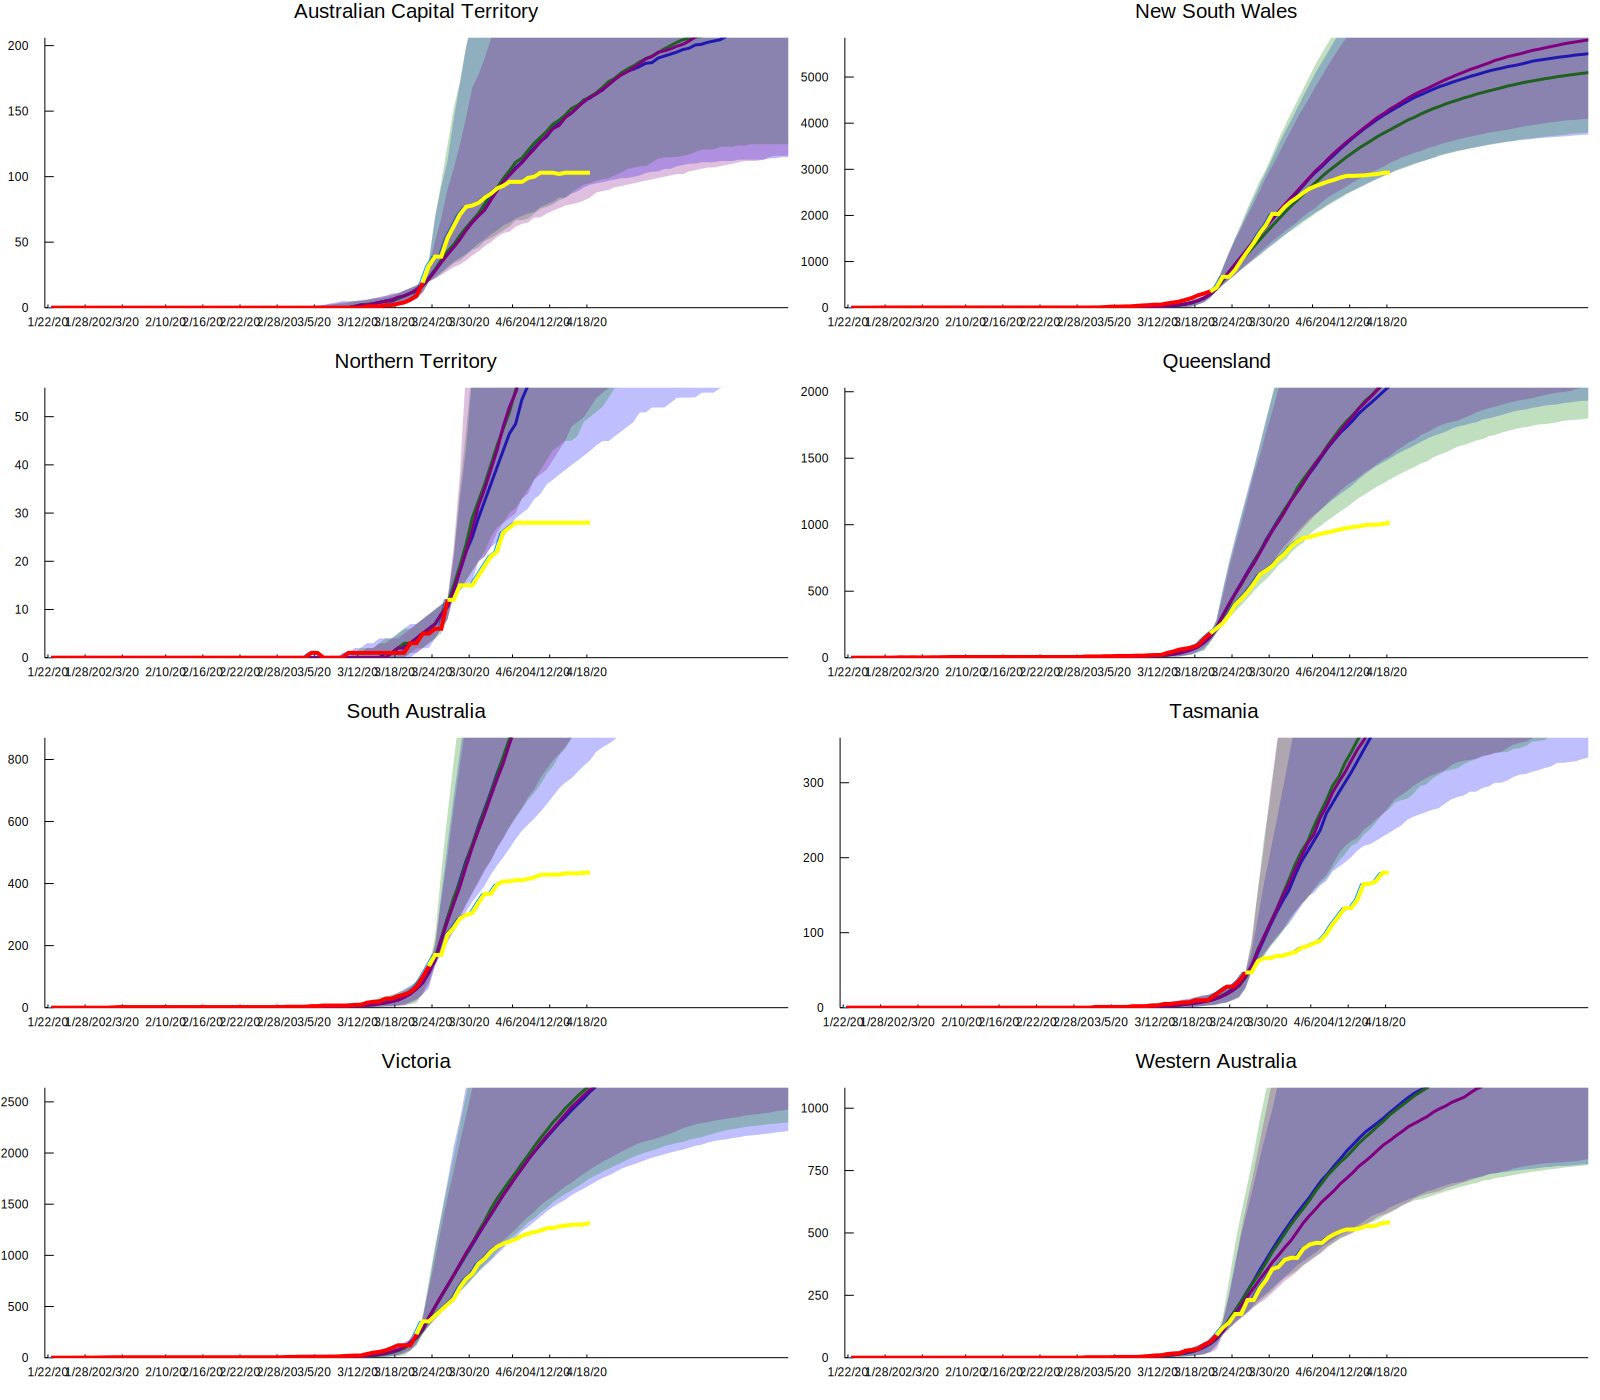

In [143]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],plt[7],plt[8],layout=(4,2),size=(1600,1400))

In [144]:
savefig("AllStates")

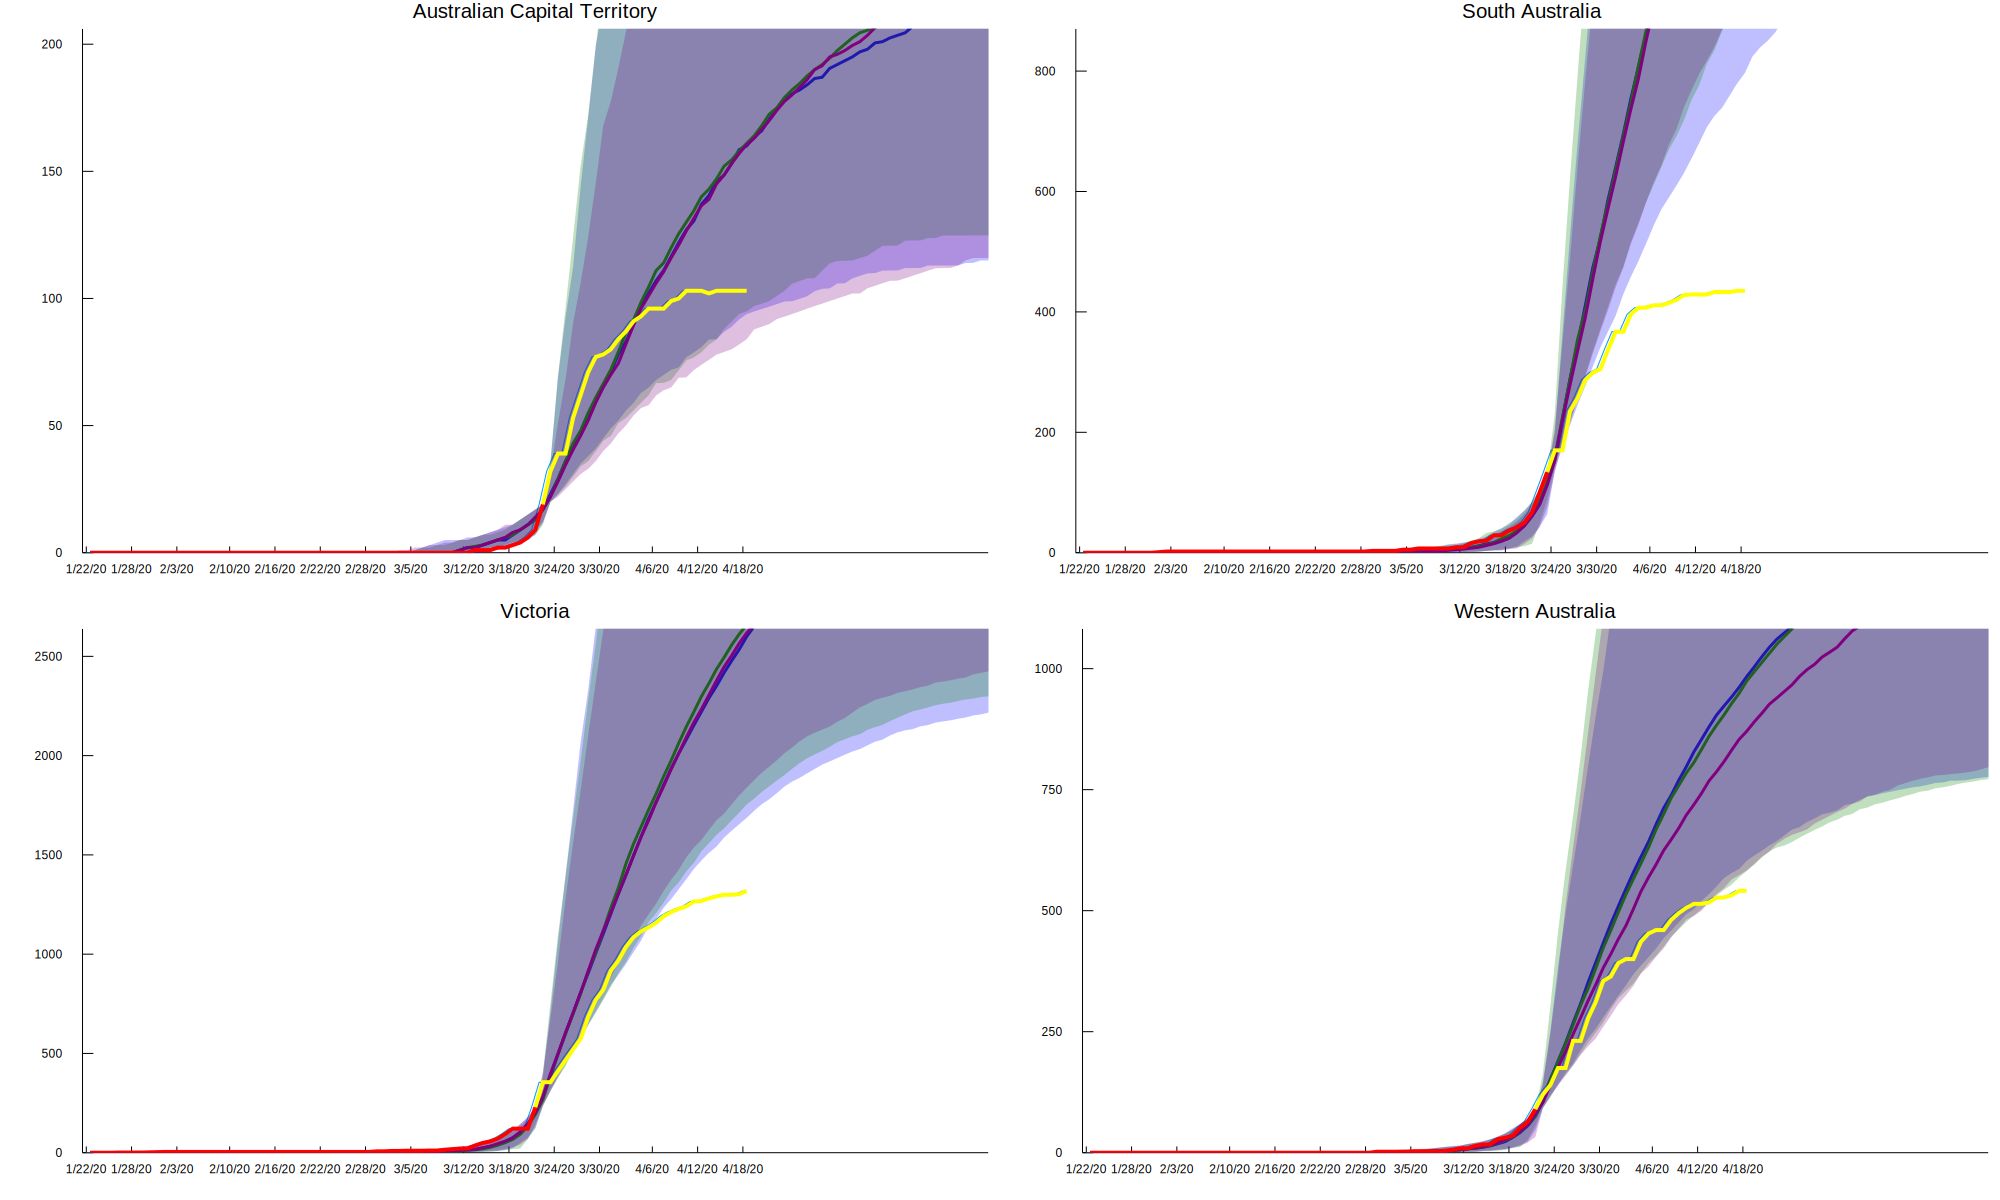

In [71]:
plot(plt[1],plt[5],plt[7],plt[8],layout=(2,2),size=(2000,1200))

In [232]:
plotly()

Plots.PlotlyBackend()

In [75]:
savefig("figure5a")

In [98]:
pops=[7451000 5639000 5518000 5806000 24280000 21540000 60360000 80300000]
allstates=["Hong Kong" "" "" "" "Shanghai" "Beijing" "" "" ]
countries=["China" "Singapore" "Finland" "Denmark" "China" "China"]
@load("Done_-Singapore")

9-element Array{Symbol,1}:
 :allrs
 :rs
 :z
 :totItps
 :tpdays
 :allstates
 :countries
 :epiparam
 :i

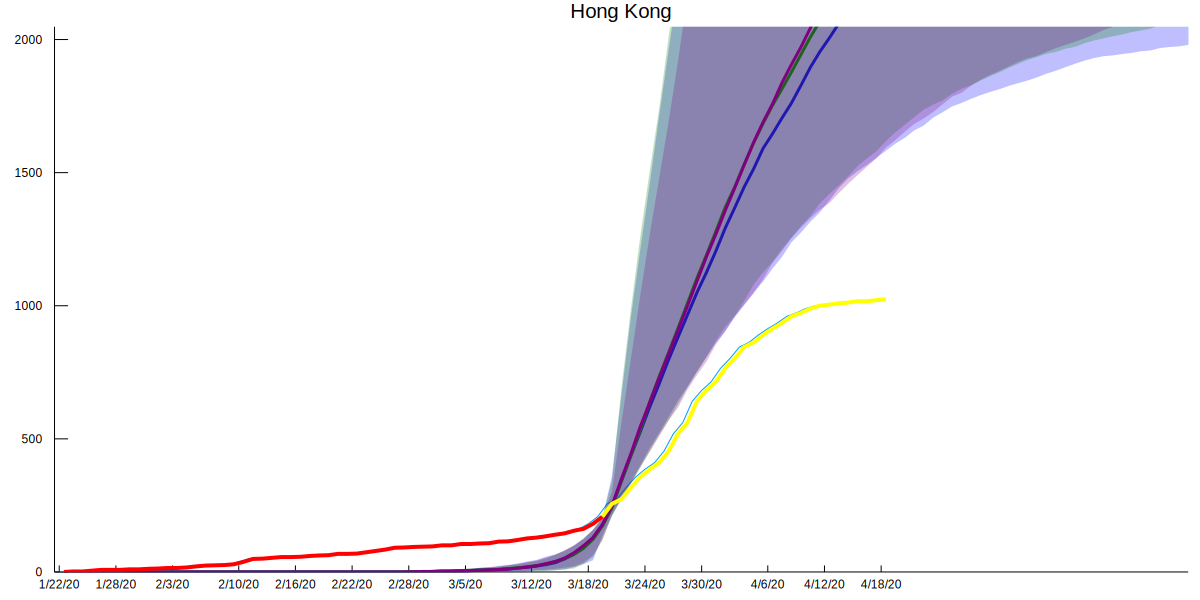

In [100]:
usename=["Hong Kong" "Singapore" "Finland" "Denmark" "Shanghai" "Beijing"]
plt=Array{Any,1}(undef,4)
i=1
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][1,2]+allrs[allstates[i]][1,1]),:blue)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][2,2]+allrs[allstates[i]][2,1]),:green)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][3,2]+allrs[allstates[i]][3,1]),:purple)
    plot!(1:tpdays[allstates[i]]+1,y[1:tpdays[allstates[i]]+1],lw=4, color=:red,label=false,title=usename[i])
    plot!(tpdays[allstates[i]]+1:ndays,y[tpdays[allstates[i]]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))


In [229]:
cd("/Users/michael/work/GitHub/epinets")
@load "done_US"

7-element Array{Symbol,1}:
 :allrs
 :z
 :totItps
 :tpdays
 :usstates
 :uslocale
 :epiparam

In [244]:
plt=Array{Any,1}(undef,length(usstates))
pops=[8398748 3990000 1749343 5150233 943332 1584064 391006 2716940]
for i in 1:length(usstates)
#    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    locale=uslocale[i]
    pop = Int(allrs[locale][1,1][1,1])
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantilesnk(pop .- (allrs[locale][1,2][1:176,:]+allrs[locale][1,1][1:176,:]),:blue)
    EpiSim.plotquantilesnk(pop .- (allrs[locale][2,2][1:176,:]+allrs[locale][2,1][1:176,:]),:green)
    EpiSim.plotquantilesnk(pop .- (allrs[locale][3,2][1:176,:]+allrs[locale][3,1][1:176,:]),:purple)
    plot!(1:tpdays[locale]+1,y[1:tpdays[locale]+1],lw=4, color=:red,label=false,title=locale)
    plot!(tpdays[locale]+1:ndays,y[tpdays[locale]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

In [245]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],plt[7],plt[8],layout=(4,2),size=(1600,1400))

<!DOCTYPE html>
 
 
 Plots.jl

In [162]:
plt

8-element Array{Any,1}:
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}

In [156]:
for (i,locale) in enumerate(uslocale)
    filetitle="done_"*join(split(locale))
    load(filetitle)
    allrs[locale]=deepcopy(rs)
    totItps[locale]=totItp
    tpdays[locale]=tpday
end
@save "done_US" allrs z totItps tpdays usstates uslocale epiparam



In [163]:
allrs

Dict{Any,Any} with 8 entries:
  "Wayne"        => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Cook"         => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Miami-Dade"   => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Orleans"      => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "New York"     => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Fairfield"    => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Philadelphia" => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…
  "Los Angeles"  => Any[UInt64[0x000000000055ff24 0x000000000055ff24 … 0x000000…

In [236]:
tpdays

Dict{Any,Any} with 8 entries:
  "Wayne"        => 68
  "Cook"         => 68
  "Miami-Dade"   => 68
  "Orleans"      => 68
  "New York"     => 68
  "Fairfield"    => 68
  "Philadelphia" => 68
  "Los Angeles"  => 68

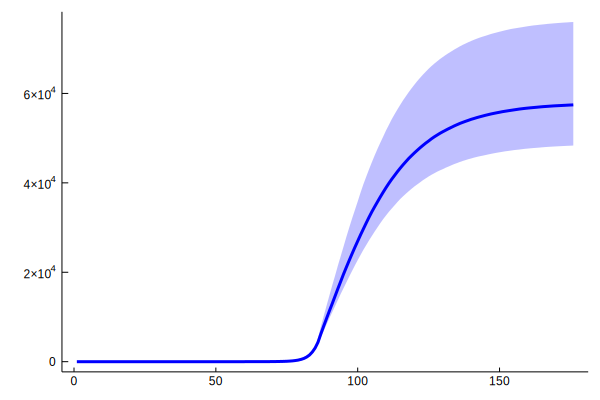

In [225]:
plot()
EpiSim.plotquantilesnk(5635876 .- (allrs["Wayne"][1,2]+allrs["Wayne"][1,1]),:blue)

In [224]:
Int(allrs["Wayne"][1,1][1,1])

5635876

In [239]:
allrs["Orleans"][1,1]

176×100 Array{UInt64,2}:
 0x000000000055ff24  0x000000000055ff24  …  0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24  …  0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24  …  0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
 0x000000000055ff24  0x000000000055ff24     0x000000000055ff24
                  ⋮                      ⋱  
 0x000000000054f866  0x0000000000551907     0x0000000000553c8d
 0x000000000054f84c  0x00000000005518ea  …  0x00